# Proyecto Final de Semestre - Programacion 1 - Newton Mercado

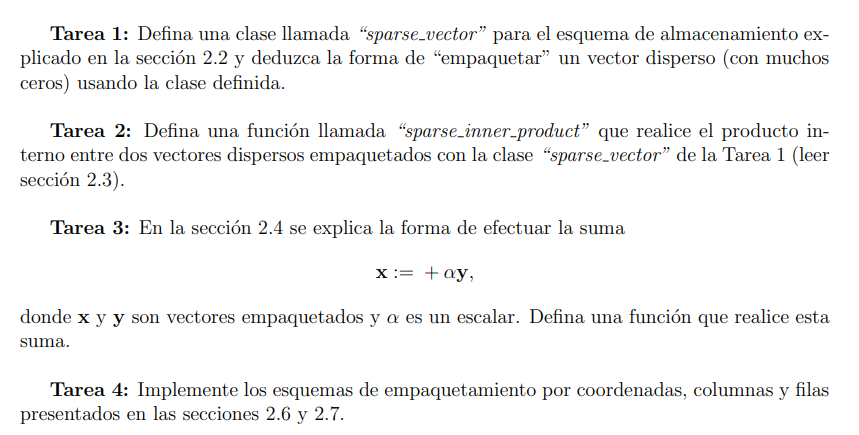

In [12]:
# Parte 1:
class SparseVector:
    def __init__(self, VectorCompleto):
        """
        Inicializa un SparseVector (VectorDisperso) a partir de un vector completo.

        :param VectorCompleto: Lista que representa el vector completo.
        """
        self.Valores, self.Indices, self.Tamaño = self.VectorPackaging(VectorCompleto)

    # Funcion vector completo a empaquetado - Vector empaquetado -
    def VectorPackaging(self, VectorCompleto):
        """
        Convierte un vector completo en 2 listas con sus valores e índices no cero.

        :param VectorCompleto: Lista o array que representa el vector completo.
        :return: (Valores, Indices) donde Valores son los valores no cero e Indices son sus posiciones.
        """
        Valores = []
        Indices = []
        Tamaño = len(VectorCompleto)
        for Indice, Valor in enumerate(VectorCompleto):  #Enumerate: funcion que genera tuplas que consisten en un contador y el valor correspondiente del iterable.
            if Valor != 0:
                Valores.append(Valor)
                Indices.append(Indice)
        # return f"El vector denso es {Valores} y el vector de indices de esos valores es {Indices}"
        return Valores, Indices, Tamaño

    # Funcion vector empaquetado a completo - Vector completo -
    def VectorPackagingToSparseVector(self):
        """
        Convierte el Vector empaquetado a un vector completo, es decir, devuelve el proceso de la funcion anterior.

        :return: Lista representando el vector completo.
        """
        Vector= [0.0] * self.Tamaño
        for Valor, Indice in zip(self.Valores, self.Indices):
            Vector[Indice] = Valor
        #return f"El vector original o completo es {Vector}"
        return Vector

    # Funcion dot  - Producto interno -
    def ProductoInterno(self, OtroVector):
      """
      Calcula el producto interno con otro vector.

      :param OtroVector: Otro vector completo (lista o array) con el que calcular el producto interno.
      :return: devuelve el producto interno."""
      ProductoInterno = 0.0

      for Valor, Indice in zip(self.Valores, self.Indices): # Note que itera en conjunto, haciendo el producto interno
        ProductoInterno += Valor * OtroVector[Indice]
      return ProductoInterno

    # Funcion representación
    def __repr__(self):
      return f"SparseVector(values={self.Valores}, indices={self.Indices}, size={self.Tamaño})"

####### -  Parte Principal - Ejemplo de uso -  ########
if __name__ == "__main__":
    # Definir un vector completo
    VectorCompleto1 = [0, 0, 3, 0, 4, 0, 0, 5]

    # Crear un vector disperso a partir del vector completo
    VectorDisperso1 = SparseVector(VectorCompleto1)
    print("Vector Disperso 1:", VectorDisperso1)

    # Convertir el vector disperso de nuevo a su forma completa
    VectorCompleto2 = VectorDisperso1.VectorPackagingToSparseVector()
    print("Vector Completo 2:", VectorCompleto2)

    # Definir otro vector completo para calcular el producto interno
    OtroVector = [1, 0, 2, 0, 3, 0, 4, 5]

    # Calcular el producto interno del vector disperso con otro vector completo
    ProductoInterno = VectorDisperso1.ProductoInterno(OtroVector)
    print("Producto Interno:", ProductoInterno)


Vector Disperso 1: SparseVector(values=[3, 4, 5], indices=[2, 4, 7], size=8)
Vector Completo 2: [0.0, 0.0, 3, 0.0, 4, 0.0, 0.0, 5]
Producto Interno: 43.0


In [15]:
def sumarMultiploVector(x, y, alpha):
    # Inicializar el vector p
    p = [0] * len(x)

    # Marcamos las posiciones de los componentes de y en p
    for Indice in range(len(y)):
        if y[Indice] != 0:
            p[Indice] = Indice + 1  # Guardamos la posición + 1 para evitar conflicto con el valor 0

    # Modificamos x usando p
    for Indice in range(len(x)):
        if p[Indice] != 0:
            x[Indice] += alpha * y[Indice]
            p[Indice] = 0

    # Añadimos nuevos componentes desde y a x
    for Indice in range(len(y)):
        if p[Indice] != 0:
            x[Indice] = alpha * y[Indice]
            p[Indice] = 0

    return x

####### -  Parte Principal - Ejemplo de uso -  ########
x = [0] * 16  # Inicializamos un vector de ceros de longitud suficiente
y = [0] * 16  # Inicializamos un vector de ceros de longitud suficiente

# Definimos los componentes no cero
x[3] = 1.0
x[7] = 2.0
x[10] = 3.0

y[1] = 4.0
y[10] = 5.0
y[15] = 6.0

alpha = 2.0

resultado = sumarMultiploVector(x, y, alpha)
print(resultado)


[0, 8.0, 0, 1.0, 0, 0, 0, 2.0, 0, 0, 13.0, 0, 0, 0, 0, 12.0]


In [14]:
# Parte 2:
class SparseMatrix:
    def __init__(self, MatrizCompleta):
        """
        Inicializa una SparseMatrix (MatrizDispersa) a partir de una matriz completa.

        :param MatrizCompleta: Lista de listas que representa la matriz completa.
        """
        self.Valores, self.IndicesFila, self.IndicesColumna, self.Mfilas, self.Ncolumnas = self.MatrixPackaging(MatrizCompleta)

    # Funcion matriz completa a empaquetada - matriz empaquetada -
    def MatrixPackaging(self, MatrizCompleta):
        """
        Convierte una matriz completa en 3 listas con sus valores, índices de fila e índices de columna no cero.

        :param MatrizCompleta: Lista de listas que representa la matriz completa.
        :return: (Valores, IndicesFila, IndicesColumna, Mfilas, Ncolumnas) donde Valores son los valores no cero,
                 IndicesFila son las posiciones de las filas, e IndicesColumna son las posiciones de las columnas.
        """

        Valores = []
        IndicesColumna= []
        IndicesFila= []
        Mfilas = len(MatrizCompleta)
        Ncolumnas=  len(MatrizCompleta[0])

        for i, Fila in enumerate(MatrizCompleta):
          for j, Entrada in enumerate(Fila):
            if Entrada != 0:
              Valores.append(Entrada)
              IndicesFila.append(i)
              IndicesColumna.append(j)
        return Valores, IndicesFila, IndicesColumna, Mfilas, Ncolumnas

    def MatrixSum(self, OtraMatriz):
      """
      Convierte una matriz completa en 3 listas con sus valores, índices de fila e índices de columna no cero.

      :param MatrizCompleta: Lista de listas que representa la matriz completa.
      :return: (Valores, IndicesFila, IndicesColumna, Mfilas, Ncolumnas) donde Valores son los valores no cero,
              IndicesFila son las posiciones de las filas, e IndicesColumna son las posiciones de las columnas.
      """
      # Crear una nueva matriz completa para almacenar el resultado de la suma
      MatrizSuma = [[0] * self.Ncolumnas for _ in range(self.Mfilas)]

      # Añadir los valores de la matriz dispersa
      for Valor, i, j in zip(self.Valores, self.IndicesFila, self.IndicesColumna):
          MatrizSuma[i][j] = Valor

      # Sumar con los valores de la otra matriz completa
      for i in range(self.Mfilas):
          for j in range(self.Ncolumnas):
            MatrizSuma[i][j] += OtraMatriz[i][j]
      return SparseMatrix(MatrizSuma)

    def __repr__(self):
      return f"SparseMatrix(values={self.Valores}, row_indices={self.IndicesFila}, col_indices={self.IndicesColumna}, num_rows={self.Mfilas},num_cols={self.Ncolumnas})"

####### -  Parte Principal - Ejemplo de uso -  ########
if __name__ == "__main__":
    # Definir una matriz completa
    MatrizCompleta1 = [
        [0, 0, 3],
        [4, 0, 0],
        [0, 5, 0]
    ]

    # Definir otra matriz completa
    MatrizCompleta2 = [
        [1, 0, 0],
        [0, 2, 0],
        [3, 0, 4]
    ]

    # Crear una matriz dispersa a partir de la primera matriz completa
    MatrizDispersa1 = SparseMatrix(MatrizCompleta1)
    print("Matriz Dispersa 1:", MatrizDispersa1)

    # Sumar la matriz dispersa con la segunda matriz completa
    MatrizSumaDispersa = MatrizDispersa1.MatrixSum(MatrizCompleta2)
    print("Matriz Suma Dispersa:", MatrizSumaDispersa)

Matriz Dispersa 1: SparseMatrix(values=[3, 4, 5], row_indices=[0, 1, 2], col_indices=[2, 0, 1], num_rows=3,num_cols=3)
Matriz Suma Dispersa: SparseMatrix(values=[1, 3, 4, 2, 3, 5, 4], row_indices=[0, 0, 1, 1, 2, 2, 2], col_indices=[0, 2, 0, 1, 0, 1, 2], num_rows=3,num_cols=3)
